<a href="https://colab.research.google.com/github/KelseyWang2022/Evaluation-algorithm-of-bus-route/blob/main/random_forest(shap).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.4 MB/s eta 0:00:00


ROC AUC Score: 0.9414581070313317
              precision    recall  f1-score   support

           1       0.84      0.88      0.86      1242
           2       0.73      0.31      0.44        35
           3       0.72      0.53      0.61       315
           4       0.81      0.84      0.83      1295

    accuracy                           0.82      2887
   macro avg       0.78      0.64      0.68      2887
weighted avg       0.81      0.82      0.81      2887

#####################PartialDependenceDisplay#########################


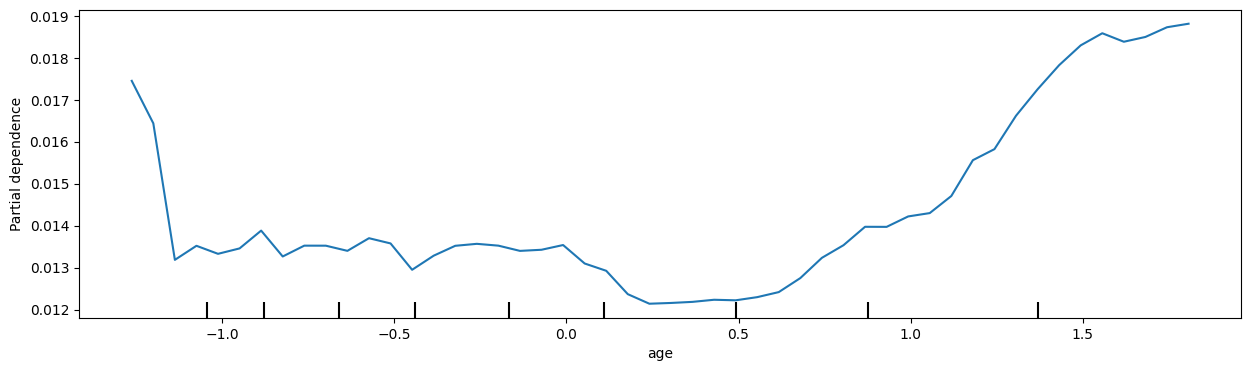

In [ ]:
##模块一：性能评估+部分依赖图（处理后的值）
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import accuracy_score, classification_report

# 加载数据
data = pd.read_csv(r'/content/merged_data_sample.csv')

# 定义目标变量和特征
categorical_features = ['lum', 'agg', 'int', 'atm', 'season', 'week', 'peak', 'catr', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'senc', 'catv', 'obs', 'obsm', 'manv', 'motor', 'place', 'catu', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']
numeric_features = ['nbv', 'vma', 'occutc', 'age']
target = 'grav'

X = data[categorical_features + numeric_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_sample = X_train.sample(n=100, random_state=42)  # 示例选择100个样本
y_sample = y_train.loc[X_sample.index]

# 数据预处理
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # 使用中位数填充数值型特征的缺失值
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # 使用众数填充分类特征的缺失值
    ('encoder', ce.TargetEncoder())  # 对分类特征进行目标编码
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 处理数据不均衡
smote = SMOTE(random_state=42)

# 随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 创建完整的处理流水线
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', rf)
])

# 模型训练
pipeline.fit(X_train, y_train)

# 模型预测
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

# 性能评估
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
print(f"ROC AUC Score: {roc_auc}")
report = classification_report(y_test, y_pred)
print(report)


print('#####################PartialDependenceDisplay#########################')
#在这里如果想要age显示原始的真实值的话，只能在初始的处理过程中忽略对age的预处理，该代码在age(without_processing)中进行
#print("Classes in classifier:", pipeline.named_steps['classifier'].classes_)因为POD只能显示某个特征对于某个类的影响

X_for_pdp = preprocessor.transform(X_train)  # This ensures all transformations are applied

features = ['age']  # Example feature
fig, ax = plt.subplots(figsize=(15, 4))# the size of figure

PartialDependenceDisplay.from_estimator(
    pipeline.named_steps['classifier'],  # Ensure this refers to your RandomForestClassifier
    X_for_pdp,  # Use preprocessed data
    features=features,  # Specify features to analyze
    feature_names=[f for f in numeric_features + categorical_features if f in X_train.columns],  # Ensure feature names match
    n_jobs=3,
    grid_resolution=50,
    ax=ax,
    target=2  # Specify the target class
)
plt.show()




ROC AUC Score: 0.9471057304423292


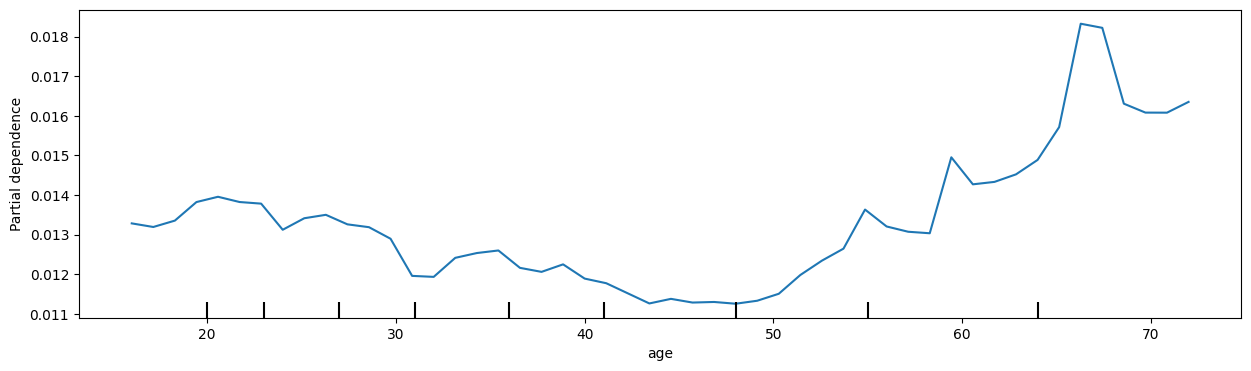

In [ ]:
#显示数值特征部份依赖图的真实值
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv(r'/content/merged_data_sample.csv')

# 定义目标变量和特征
categorical_features = ['lum', 'agg', 'int', 'atm', 'season', 'week', 'peak', 'catr', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'senc', 'catv', 'obs', 'obsm', 'manv', 'motor', 'place', 'catu', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']
numeric_features = ['nbv', 'vma', 'occutc', 'age']
target = 'grav'

X = data[categorical_features + numeric_features]
y = data[target]

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据预处理，排除 'age'
numeric_features_no_age = [feat for feat in numeric_features if feat != 'age']  # Exclude 'age' from scaling
categorical_features_no_catr = [feat for feat in categorical_features if feat != 'catr']  # Exclude 'age' from scaling

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

numeric_transformer_no_scale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))  # Only impute, no scaling for 'age'
])
categorical_transformer_no_scale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Only impute, no scaling for 'age'
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', ce.TargetEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_no_scale', numeric_transformer_no_scale, ['age']),  # Process 'age' without scaling
        ('cat_no_scale', categorical_transformer_no_scale, ['catr']),
        ('num', numeric_transformer, numeric_features_no_age),
        ('cat', categorical_transformer, categorical_features)
    ])

# 处理数据不均衡
smote = SMOTE(random_state=42)

# 随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 创建完整的处理流水线
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', rf)
])

# 模型训练
pipeline.fit(X_train, y_train)

# 模型预测
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

# 性能评估
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
print(f"ROC AUC Score: {roc_auc}")

# 部分依赖图

X_train_transformed = preprocessor.transform(X_train)  # Preprocess data
features = ['age']  # Example feature, make sure 'age' is appropriately preprocessed
fig, ax = plt.subplots(figsize=(15, 4))

# Use PartialDependenceDisplay with the correctly preprocessed data
PartialDependenceDisplay.from_estimator(
    pipeline.named_steps['classifier'],
    X_train_transformed,
    features=features,
    feature_names=['age'] + numeric_features_no_age + categorical_features,  # Update feature names
    n_jobs=3,
    grid_resolution=50,
    ax=ax,
    target=2  # Specify the target class
)
plt.show()



In [ ]:
#分类特征的部分依赖图的真实值（未成功）
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv(r'/content/merged_data_sample.csv')

# 定义目标变量和特征
categorical_features = ['lum', 'agg', 'int', 'atm', 'season', 'week', 'peak', 'catr', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'senc', 'catv', 'obs', 'obsm', 'manv', 'motor', 'place', 'catu', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']
numeric_features = ['nbv', 'vma', 'occutc', 'age']
target = 'grav'

X = data[categorical_features + numeric_features]
y = data[target]

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据预处理，排除 'age'
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())  # 使用 OneHotEncoder
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 处理数据不均衡
smote = SMOTE(random_state=42)

# 随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 创建完整的处理流水线
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', rf)
])

# 模型训练
pipeline.fit(X_train, y_train)

# 模型预测
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

# 性能评估
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
print(f"ROC AUC Score: {roc_auc}")

# 部分依赖图
X_train_transformed = preprocessor.transform(X_train)  # Preprocess data
feature_names = preprocessor.transformers_[1][1]['encoder'].get_feature_names(categorical_features)  # Get feature names from OneHotEncoder
catr_features = [i for i, name in enumerate(feature_names) if 'catr' in name]  # Indexes of catr features

fig, ax = plt.subplots(figsize=(15, 4))
PartialDependenceDisplay.from_estimator(
    pipeline.named_steps['classifier'],
    X_train_transformed,
    features=catr_features,  # Use indexes of catr features
    feature_names=feature_names,
    n_jobs=3,
    grid_resolution=50,
    ax=ax
)
plt.show()


ROC AUC Score: 0.9324560703822168


AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

[4 1 3 2]
Original Categorical Features: ['lum', 'agg', 'int', 'atm', 'season', 'week', 'peak', 'catr', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'senc', 'catv', 'obs', 'obsm', 'manv', 'motor', 'place', 'catu', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']
Columns in X_train: ['lum', 'agg', 'int', 'atm', 'season', 'week', 'peak', 'catr', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'senc', 'catv', 'obs', 'obsm', 'manv', 'motor', 'place', 'catu', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp', 'nbv', 'vma', 'occutc', 'age']
ROC AUC Score: 0.9414581070313317
F1 Score: 0.8126213781477724


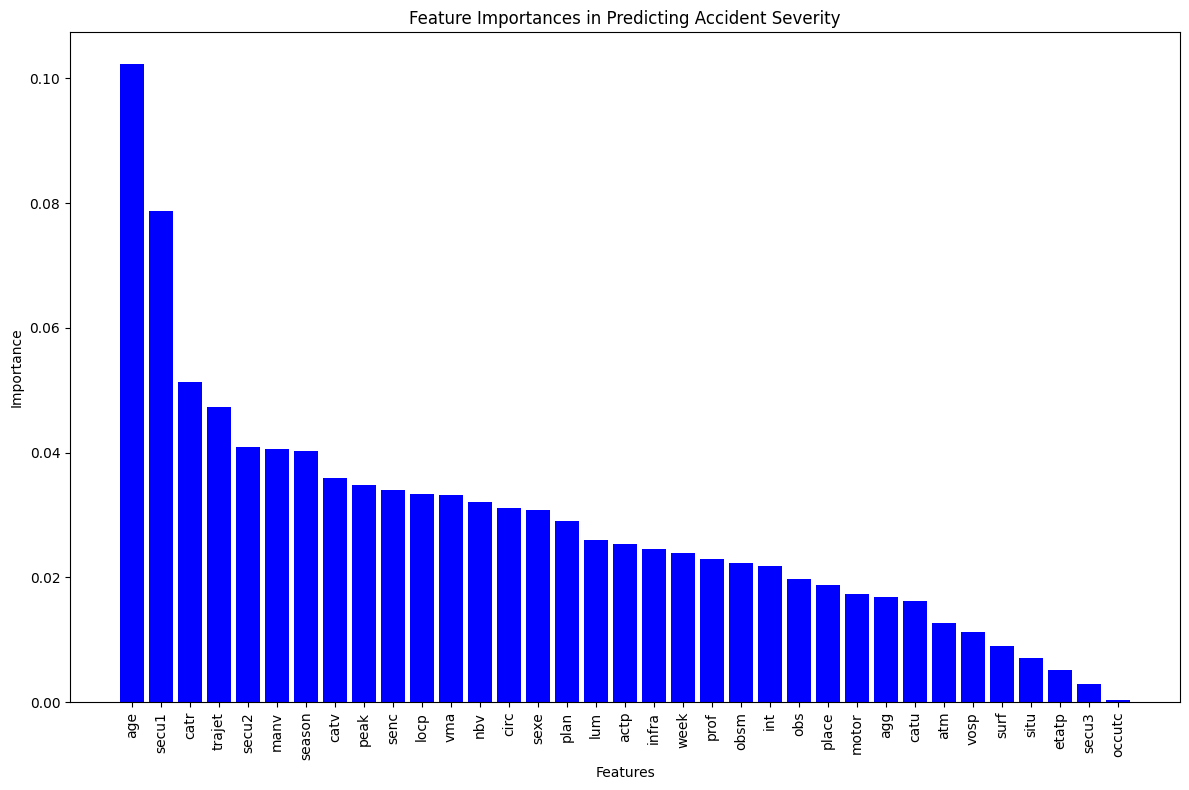

<class 'list'>
<class 'list'>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import shap
from sklearn.metrics import roc_auc_score, f1_score
# 加载数据
data = pd.read_csv(r'/content/merged_data_sample.csv')

# 定义目标变量和特征
categorical_features = [
    'lum', 'agg', 'int', 'atm', 'season', 'week', 'peak', 'catr', 'circ', 'vosp', 'prof', 'plan',
    'surf', 'infra', 'situ', 'senc', 'catv', 'obs', 'obsm', 'manv', 'motor', 'place', 'catu',
    'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp'
]
numeric_features = ['nbv', 'vma', 'occutc', 'age']
target = 'grav'

X = data[categorical_features + numeric_features]
y = data[target]
print(y.unique())


# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_sample = X_train.sample(n=100, random_state=42)  # 示例选择100个样本
# y_sample = y_train.loc[X_sample.index]
# print(y_sample.unique())

# 确认列名一致性
print("Original Categorical Features:", categorical_features)
print("Columns in X_train:", X_train.columns.tolist())

# 预处理步骤
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = ce.TargetEncoder(cols=categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

# 处理数据不均衡
smote = SMOTE(random_state=42)

# 随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 创建完整的处理流水线
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', rf)
])

# 训练模型
pipeline.fit(X_train, y_train)

# 模型预测
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

# 性能评估
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
print(f"ROC AUC Score: {roc_auc}")
print(f"F1 Score: {f1}")

# 获取特征重要性
importances = pipeline.named_steps['classifier'].feature_importances_

# 获取特征名称
numeric_features = np.array(numeric_features)
categorical_features = np.array(categorical_features)
feature_names = np.concatenate([numeric_features, categorical_features])

# 对特征重要性进行排序
indices = np.argsort(importances)[::-1]

# 可视化特征重要性
plt.figure(figsize=(12, 8))
plt.title("Feature Importances in Predicting Accident Severity")
plt.bar(range(len(importances)), importances[indices], color='b', align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Get feature names
feature_names_numeric = numeric_features
feature_names_categorical = categorical_features
feature_names_numeric = list(feature_names_numeric)
feature_names_categorical = list(feature_names_categorical)

feature_names = feature_names_numeric + feature_names_categorical
print(type(feature_names_numeric))
print(type(feature_names_categorical))


# # # SHAP values
# explainer = shap.Explainer(pipeline.named_steps['classifier'], pipeline.named_steps['preprocessor'].transform(X_train))
# shap_values = explainer(pipeline.named_steps['preprocessor'].transform(X_train), check_additivity=False)



In [ ]:
##########已经验证没问题##############
##########各个事故的shap值###########
import shap
import matplotlib.pyplot as plt
import pandas as pd

# shap解释每个类的特征的影响
def calculate_and_plot_shap_values(pipeline, X_transformed, feature_names, class_indices):
    # 创建 SHAP 解释器
    explainer = shap.Explainer(pipeline.named_steps['classifier'], X_transformed)

    # 计算 SHAP 值
    shap_values = explainer(X_transformed, check_additivity=False)

    # 为每个类别绘制并保存 SHAP 值
    for class_index in class_indices:
        # 绘制普通的SHAP summary图
        plt.figure()
        shap.summary_plot(shap_values[:,:,class_index], X_transformed, feature_names=feature_names, show=False)
        plt.title(f"SHAP Values for Class {class_index}")
        plt.savefig(f'shap_summary_class_{class_index}.png')  # 保存到文件
        plt.close()  # 关闭图形，避免重复显示

        # 绘制条形图的SHAP summary图
        plt.figure()
        shap.summary_plot(shap_values[:,:,class_index], X_transformed, feature_names=feature_names, show=False, plot_type="bar")
        plt.title(f"SHAP Bar Values for Class {class_index}")
        plt.savefig(f'shap_summary_bar_class_{class_index}.png')  # 保存到文件
        plt.close()  # 关闭图形

# 仅需要转换一次
X_transformed = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_train), columns=feature_names)

# 用实例数据调用此函数
calculate_and_plot_shap_values(pipeline, X_transformed, feature_names, class_indices=[0,1,2,3])


100%|===================| 46174/46180 [115:27<00:00]       

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.6 MB/s eta 0:00:00


In [2]:
!pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


ROC AUC Score: 0.7203102766350464
F1 Score: 0.6167123841890197
<class 'list'>
<class 'list'>


 97%|=================== | 1559/1600 [00:56<00:01]       

Shape of SHAP values: (400, 35, 4)
Using SHAP values of shape: (400, 35)


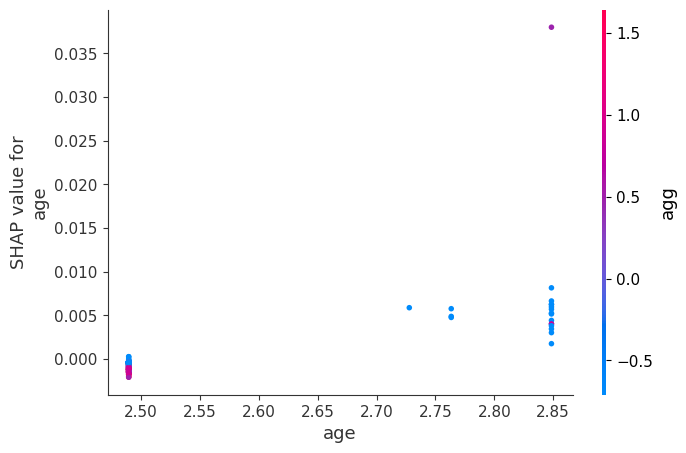

In [3]:
#shop_dependence_plot绘制age,secu1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import shap
from sklearn.metrics import roc_auc_score, f1_score

# 加载数据
data = pd.read_csv(r'/content/merged_data_sample.csv')

# 为了测试，随机选择100个样本
data_sample = data.sample(n=500, random_state=42)

# 定义目标变量和特征
categorical_features = [
    'lum', 'agg', 'int', 'atm', 'season', 'week', 'peak', 'catr', 'circ', 'vosp', 'prof', 'plan',
    'surf', 'infra', 'situ', 'senc', 'catv', 'obs', 'obsm', 'manv', 'motor', 'place', 'catu',
    'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp'
]
numeric_features = ['nbv', 'vma', 'occutc', 'age']
target = 'grav'

X = data_sample[categorical_features + numeric_features]
y = data_sample[target]

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 预处理步骤
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = ce.TargetEncoder(cols=categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

# 处理数据不均衡
smote = SMOTE(random_state=42)

# 随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 创建完整的处理流水线
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', rf)
])

# 训练模型
pipeline.fit(X_train, y_train)

# 模型预测
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

# 性能评估
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
print(f"ROC AUC Score: {roc_auc}")
print(f"F1 Score: {f1}")


numeric_features = np.array(numeric_features)
categorical_features = np.array(categorical_features)
feature_names = np.concatenate([numeric_features, categorical_features])

# Get feature names
# Get feature names
feature_names_numeric = numeric_features
feature_names_categorical = categorical_features
feature_names_numeric = list(feature_names_numeric)
feature_names_categorical = list(feature_names_categorical)

feature_names = feature_names_numeric + feature_names_categorical
print(type(feature_names_numeric))
print(type(feature_names_categorical))
# SHAP values analysis
explainer = shap.Explainer(pipeline.named_steps['classifier'], pipeline.named_steps['preprocessor'].transform(X_train))
shap_values = explainer(pipeline.named_steps['preprocessor'].transform(X_train), check_additivity=False)

# Print SHAP values shape for debugging
print("Shape of SHAP values:", shap_values.shape)

# Correctly referencing SHAP values and using transformed features for plotting
try:
    # Assuming shap_values has an extra dimension for classes, extract values for one class
    shap_values_class = shap_values.values[:,:,1]  # Modify this if a different class index is needed
except IndexError:
    # Fallback if no class dimension is present
    shap_values_class = shap_values.values

# Check shape of the SHAP values being used
print("Using SHAP values of shape:", shap_values_class.shape)

# Use the correct feature names and transformed data for the dependence plot
X_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
feature_names = [f for f in X_train.columns]  # Ensure this list matches the columns used in X_transformed

# Creating the SHAP dependence plot
shap.dependence_plot('age', shap_values_class, X_transformed, feature_names=feature_names)


In [ ]:
#shop_dependence_plot绘制secu1和交互特征的依赖图，代码没问题，但是显示的是处理后的值，并不是真实值
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import shap
from sklearn.metrics import roc_auc_score, f1_score

# 加载数据
data = pd.read_csv(r'/content/merged_data_sample.csv')
# 为了测试，随机选择100个样本
data_sample = data.sample(n=500, random_state=42)

# 为了测试，随机选择100个样本
#data_sample = data.sample(n=500, random_state=42)

# 定义目标变量和特征
categorical_features = [
    'lum', 'agg', 'int', 'atm', 'season', 'week', 'peak', 'catr', 'circ', 'vosp', 'prof', 'plan',
    'surf', 'infra', 'situ', 'senc', 'catv', 'obs', 'obsm', 'manv', 'motor', 'place', 'catu',
    'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp'
]
numeric_features = ['nbv', 'vma', 'occutc', 'age']
target = 'grav'

X = data_sample[categorical_features + numeric_features]
y = data_sample[target]

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 预处理步骤
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = ce.TargetEncoder(cols=categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

# 处理数据不均衡
smote = SMOTE(random_state=42)

# 随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 创建完整的处理流水线
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', rf)
])

# 训练模型
pipeline.fit(X_train, y_train)

# 模型预测
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

# 性能评估
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
print(f"ROC AUC Score: {roc_auc}")
print(f"F1 Score: {f1}")


numeric_features = np.array(numeric_features)
categorical_features = np.array(categorical_features)
feature_names = np.concatenate([numeric_features, categorical_features])

# Get feature names
# Get feature names
feature_names_numeric = numeric_features
feature_names_categorical = categorical_features
feature_names_numeric = list(feature_names_numeric)
feature_names_categorical = list(feature_names_categorical)

feature_names = feature_names_numeric + feature_names_categorical
print(type(feature_names_numeric))
print(type(feature_names_categorical))
# SHAP values analysis
explainer = shap.Explainer(pipeline.named_steps['classifier'], pipeline.named_steps['preprocessor'].transform(X_train))
shap_values = explainer(pipeline.named_steps['preprocessor'].transform(X_train), check_additivity=False)

# Print SHAP values shape for debugging
print("Shape of SHAP values:", shap_values.shape)

# Correctly referencing SHAP values and using transformed features for plotting
try:
    # Assuming shap_values has an extra dimension for classes, extract values for one class
    shap_values_class = shap_values.values[:,:,1]  # Modify this if a different class index is needed
except IndexError:
    # Fallback if no class dimension is present
    shap_values_class = shap_values.values

# Check shape of the SHAP values being used
print("Using SHAP values of shape:", shap_values_class.shape)

# Use the correct feature names and transformed data for the dependence plot
X_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
feature_names = [f for f in X_train.columns]  # Ensure this list matches the columns used in X_transformed

# Creating the SHAP dependence plot
shap.dependence_plot('secu1', shap_values_class, X_transformed, feature_names=feature_names)

plt.savefig(f'shap_dependence_class_{shap_values_class}.png')  # 保存到文件
plt.close()  # 关闭图形，避免重复显示

ROC AUC Score: 0.9414581070313317
F1 Score: 0.8126213781477724
<class 'list'>
<class 'list'>


  6%|=                   | 2952/46180 [07:17<106:39]       

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import shap
from sklearn.metrics import roc_auc_score, f1_score

# 加载数据
data_sample = pd.read_csv(r'/content/merged_data_sample.csv')

# 定义目标变量和特征
categorical_features = [
    'lum', 'agg', 'int', 'atm', 'season', 'week', 'peak', 'catr', 'circ', 'vosp', 'prof', 'plan',
    'surf', 'infra', 'situ', 'senc', 'catv', 'obs', 'obsm', 'manv', 'motor', 'place', 'catu',
    'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp'
]
numeric_features = ['nbv', 'vma', 'occutc', 'age']
target = 'grav'

X = data_sample[categorical_features + numeric_features]
y = data_sample[target]

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 预处理步骤
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = ce.TargetEncoder(cols=categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

# 处理数据不均衡
smote = SMOTE(random_state=42)

# 随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 创建完整的处理流水线
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', rf)
])

# 训练模型
pipeline.fit(X_train, y_train)

# 模型预测
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

# 性能评估
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
print(f"ROC AUC Score: {roc_auc}")
print(f"F1 Score: {f1}")

# SHAP values analysis
explainer = shap.Explainer(pipeline.named_steps['classifier'], pipeline.named_steps['preprocessor'].transform(X_train))
shap_values = explainer(pipeline.named_steps['preprocessor'].transform(X_train), check_additivity=False)

# Print SHAP values shape for debugging
print("Shape of SHAP values:", shap_values.shape)

# Correctly referencing SHAP values and using transformed features for plotting
try:
    # Assuming shap_values has an extra dimension for classes, extract values for one class
    shap_values_class = shap_values.values[:,:,1]  # Modify this if a different class index is needed
except IndexError:
    # Fallback if no class dimension is present
    shap_values_class = shap_values.values

# Check shape of the SHAP values being used
print("Using SHAP values of shape:", shap_values_class.shape)

# Use the correct feature names and transformed data for the dependence plot
X_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
feature_names = [f for f in X_train.columns]  # Ensure this list matches the columns used in X_transformed

# Creating the SHAP dependence plot with original feature values for display
shap.dependence_plot('secu1', shap_values_class, X_transformed, display_features=X_train, feature_names=feature_names)

# Save the plot to a file
plt.savefig('shap_dependence_secu1.png')
plt.close()
